<a href="https://colab.research.google.com/github/hectormelo/Machine-Learning-Techniques/blob/main/Lab_3/Laboratorio%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img src="https://raw.githubusercontent.com/hectormelo/Machine-Learning-Techniques/main/Banner.png" ><br>
# Machine Learning Techniques - MISIS4219

Primer semestre - 2024

En la actualidad, la cantidad de artículos publicados en Internet está generando una gran ola de información accesible por cualquier usuario, dando a conocer diferentes puntos de vista, opiniones, información e investigaciones sobre diferentes temas de interés.

Esta gran cantidad de información no solo permite una búsqueda exhaustiva sobre un tema, también permite realizar un análisis sobre la tendencia de los diferentes temas que estén dando de qué hablar en una sociedad. Es por ello que un grupo de expertos se ha dado la tarea de analizar 1217 artículos web y clasificarlos para poder establecer un análisis de los temas en la actualidad.

Para ello, como experto en análisis con machine learning, le han pedido que construya un modelo capaz de clasificar los nuevos artículos, realice un análisis de cuáles son los temas que dan de que hablar y automatice el proceso de selección y búsqueda de diferentes artículos.


Objetivos:
* Realizar el análisis y limpieza de textos.
* Explorar las diferentes técnicas de transformación de datos no estructurados.
* Establecer el mejor modelo basado en SVM.

## 0. Importación de Librerías.

Para el desarrollo en Google Colab, y poder ejecutar la librería de Pandas-Profiling, debemos ejecutar el siguiente código.


In [1]:
%pip install ydata-profiling contractions nltk inflect

Note: you may need to restart the kernel to use updated packages.


Para este ejercicio, utilizaremos las siguientes librerías.

In [2]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /home/leandro_driguez/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/leandro_driguez/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/leandro_driguez/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/leandro_driguez/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /home/leandro_driguez/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-da

True

In [47]:
#Manejo de datos
import pandas as pd
import numpy as np

#Visualización de datos
import matplotlib.pyplot as plt
%matplotlib inline

import re, unicodedata
import contractions
import inflect
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer

#Analisis profundo de datos
from ydata_profiling import ProfileReport

#Entrenamiento del modelo
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Librería para la creación de nube de etiquetas -Wordcloud.
from wordcloud import WordCloud

## 1. Entendimiento del Negocio

El contexto que nos han dado los expertos ha sido el siguiente:

Los artículos obtenidos por web-scrapping han sido clasificados bajo las siguientes categorias:

* Alianzas
* Innovacion
* Macroeconomia
* Regulaciones
* Reputacion
* Sostenibilidad
* Otra

Los datos se encuentran en el siguiente repositorio de [Kaggel](https://www.kaggle.com/datasets/kevinmorgado/spanish-news-classification)

## 2. Entendimiento de los Datos

Luego de entender el negocio y su objetivo, vamos a realizar la exploración de datos. Así que, leeremos los datos.

In [4]:
url = 'df_total.csv'
data = pd.read_csv(url)
data.head() #Veremos las primeras líneas del dataset, para ver si leyó correctamente

url  \
0  https://www.larepublica.co/redirect/post/3201905   
1  https://www.larepublica.co/redirect/post/3210288   
2  https://www.larepublica.co/redirect/post/3240676   
3  https://www.larepublica.co/redirect/post/3342889   
4  https://www.larepublica.co/redirect/post/3427208   

                                                news           Type  
0  Durante el foro La banca articulador empresari...           Otra  
1  El regulador de valores de China dijo el domin...   Regulaciones  
2  En una industria históricamente masculina como...       Alianzas  
3  Con el dato de marzo el IPC interanual encaden...  Macroeconomia  
4  Ayer en Cartagena se dio inicio a la versión n...           Otra

Primero necesitaremos dividir nuestros datos en datos de entrenamiento (train) y datos de evaluación (test).

In [5]:
train, test = train_test_split(data, test_size=0.2, random_state=33)
train.head()

url  \
257   https://www.bbva.com/es/the-merge-ethereum-gan...   
1000  https://www.bbva.com/es/es/bbva-revoluciona-el...   
76     https://www.larepublica.co/redirect/post/3201861   
204   https://www.bbva.com/es/euros-digitales-cripto...   
1148  https://www.bbva.com/es/sostenibilidad/que-es-...   

                                                   news            Type  
257   Como cambiarle a un coche su motor diésel por ...      Innovacion  
1000  BBVA ha lanzado en España una nueva tarjeta de...      Innovacion  
76    En el marco del Foro LR La banca promotora del...            Otra  
204   El auge de las criptomonedas, especialmente en...      Innovacion  
1148  Los expertos de las Naciones Unidas dicen que ...  Sostenibilidad

Utilizaremos la libreria de `pandas-profiling` para realizar una exploración de datos más profunda

In [6]:
ProfileReport(train)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
def mostrar_grafico(palabras,stopwords=[]):
    comment_words = ''

    # iterate through the csv file
    for val in palabras:

        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)

    # plot the WordCloud image
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

Y realizamos un `WordCloud`, el cuál nos permitirá realizar un análisis de las palabras más recurrentes dentro de cada una de las categorias.

---------- Words for class: Innovacion ----------


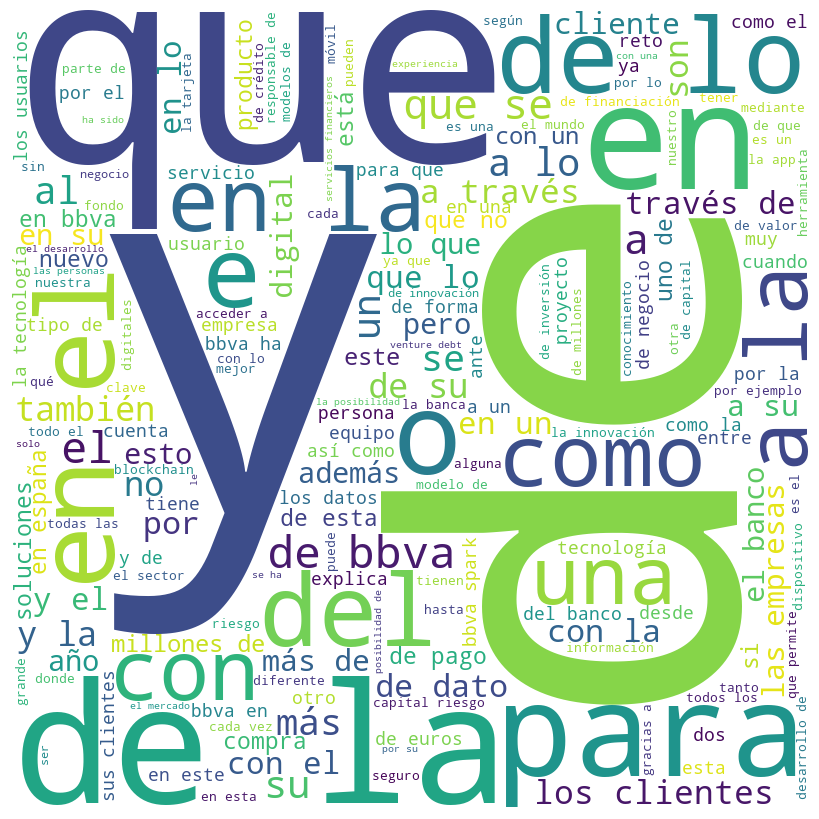

---------- Words for class: Otra ----------


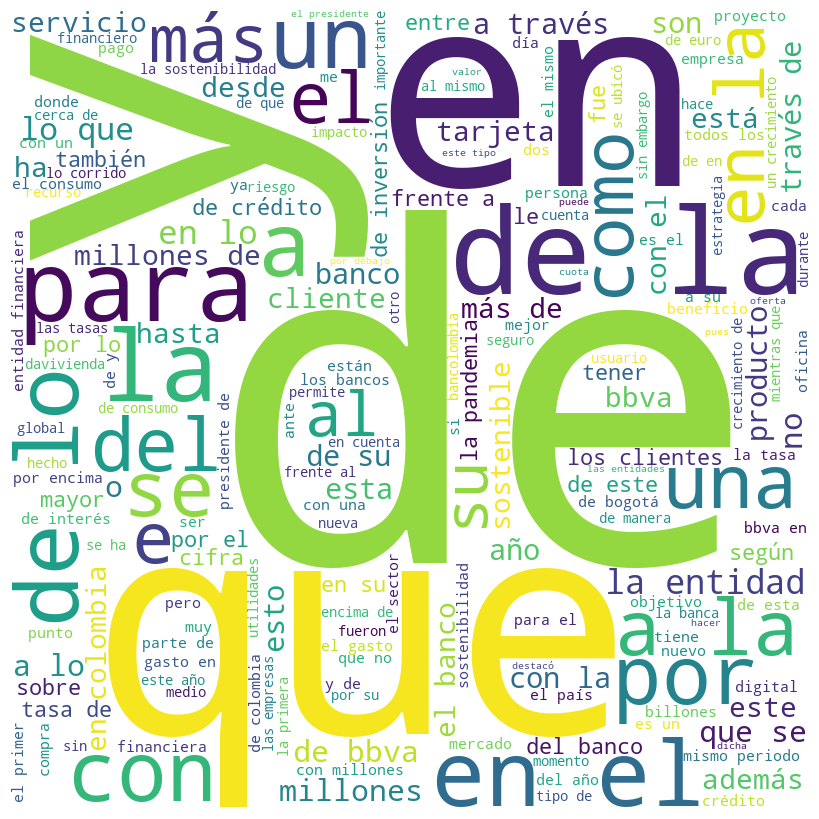

---------- Words for class: Sostenibilidad ----------


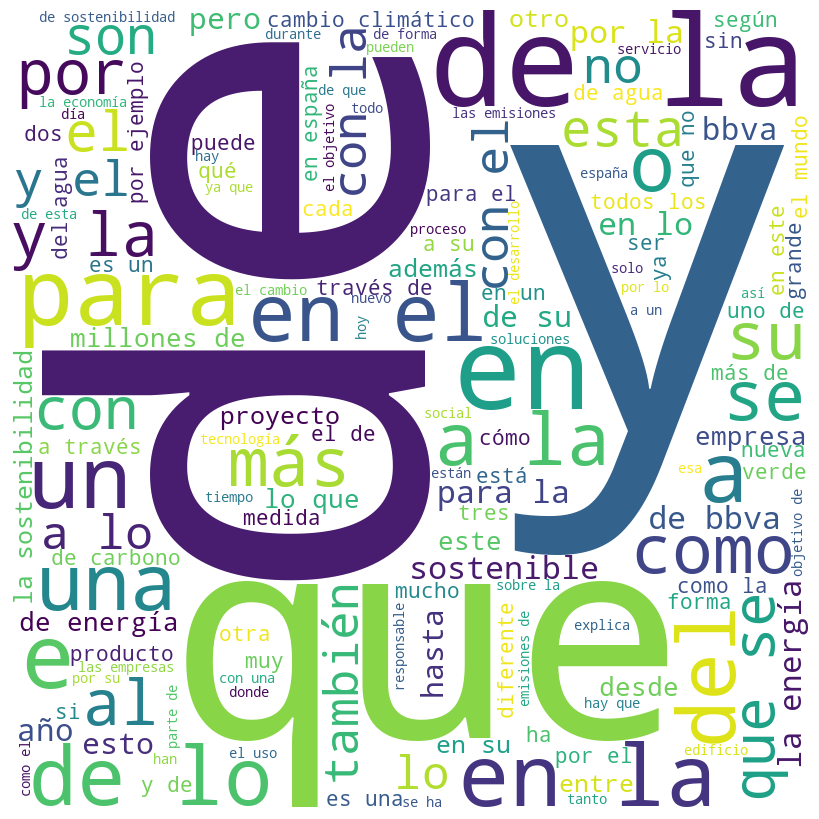

---------- Words for class: Macroeconomia ----------


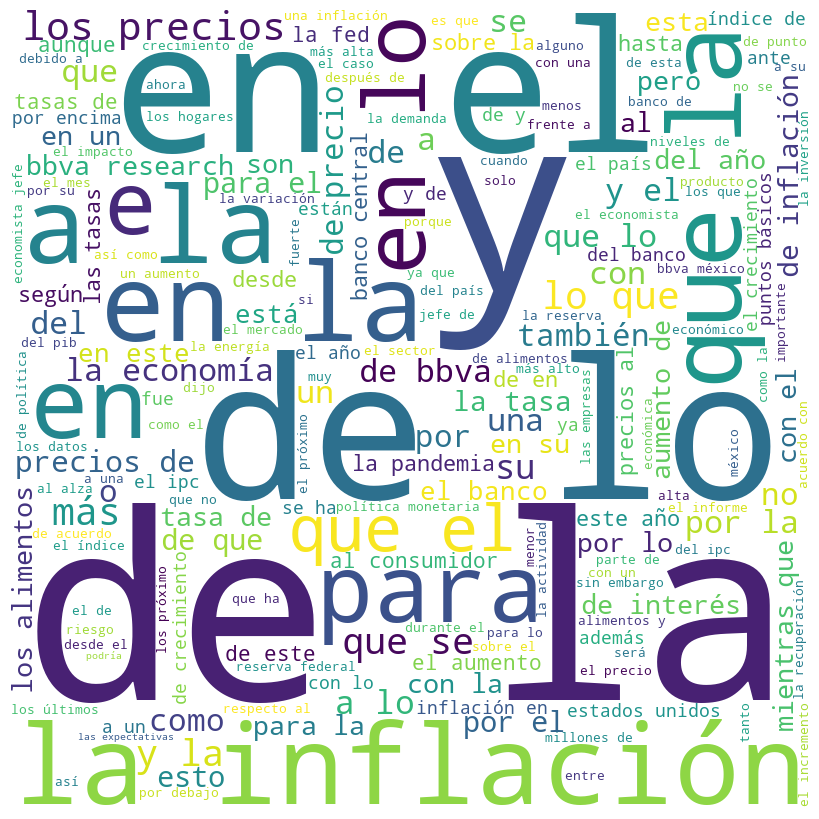

---------- Words for class: Regulaciones ----------


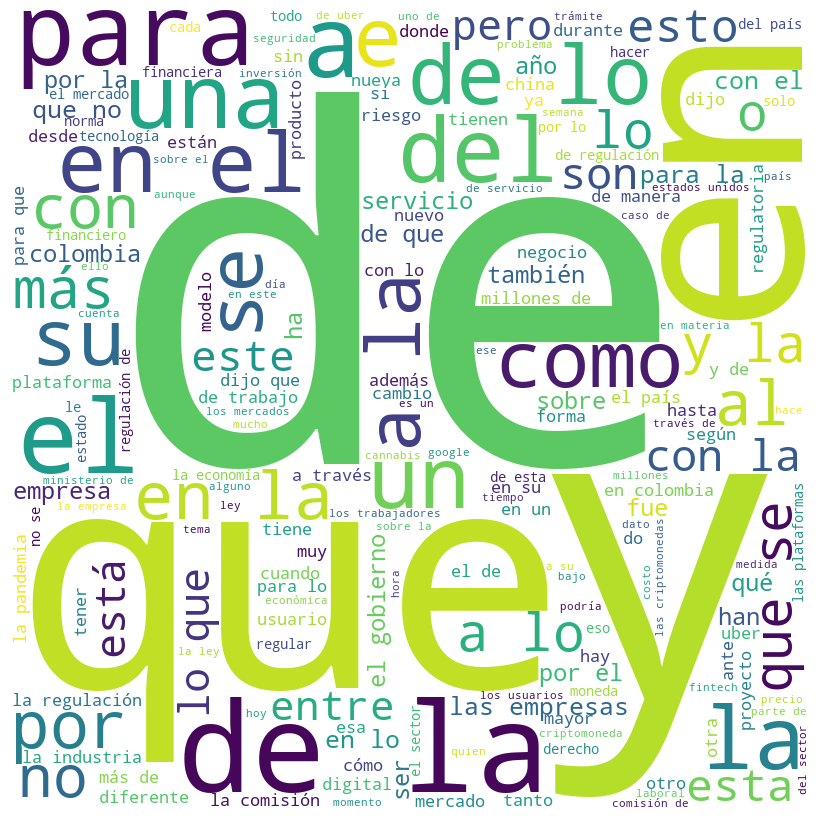

---------- Words for class: Alianzas ----------


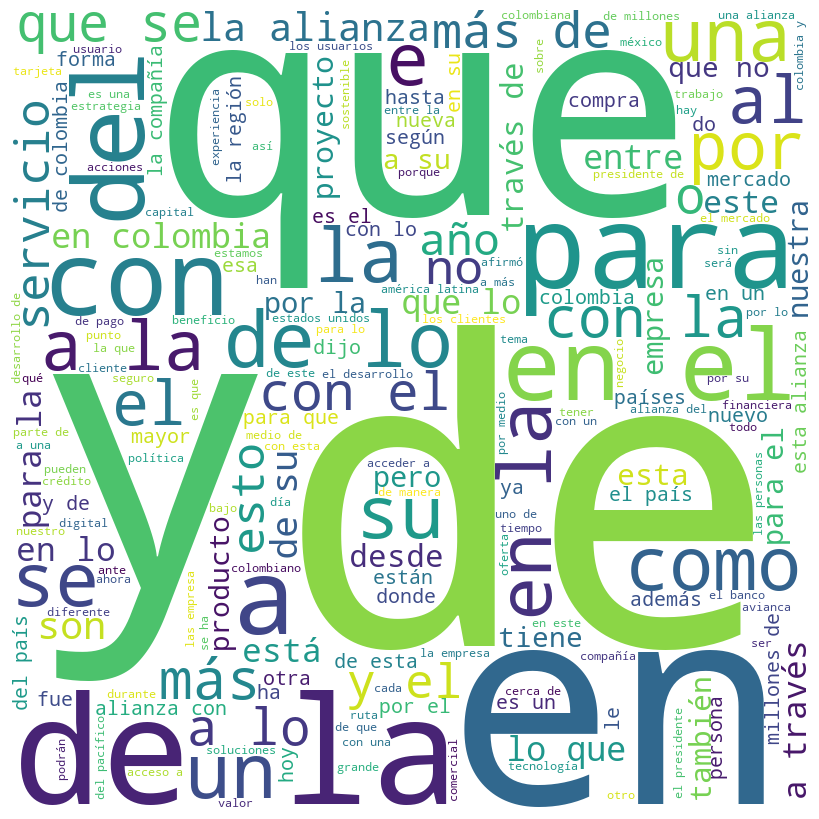

---------- Words for class: Reputacion ----------


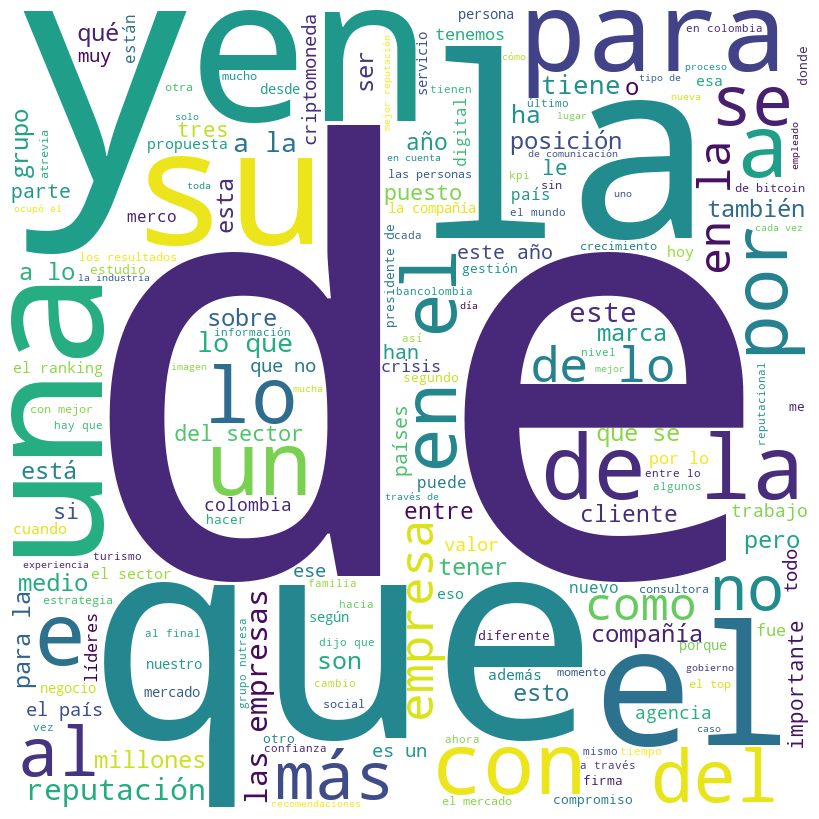

In [8]:
for i in train['Type'].unique():
    print(f'---------- Words for class: {i} ----------')
    mostrar_grafico(train.loc[train['Type']==i,'news'])

Como vimos, hay varias palabras frecuentes que no aportan mucha información, esas palabras las llamamos `stopwords`. Existen librerias que han construido esta lista en los diferentes idiomas, así que utilizaremos las palabras vacías en español.

---------- Words for class: Innovacion ----------


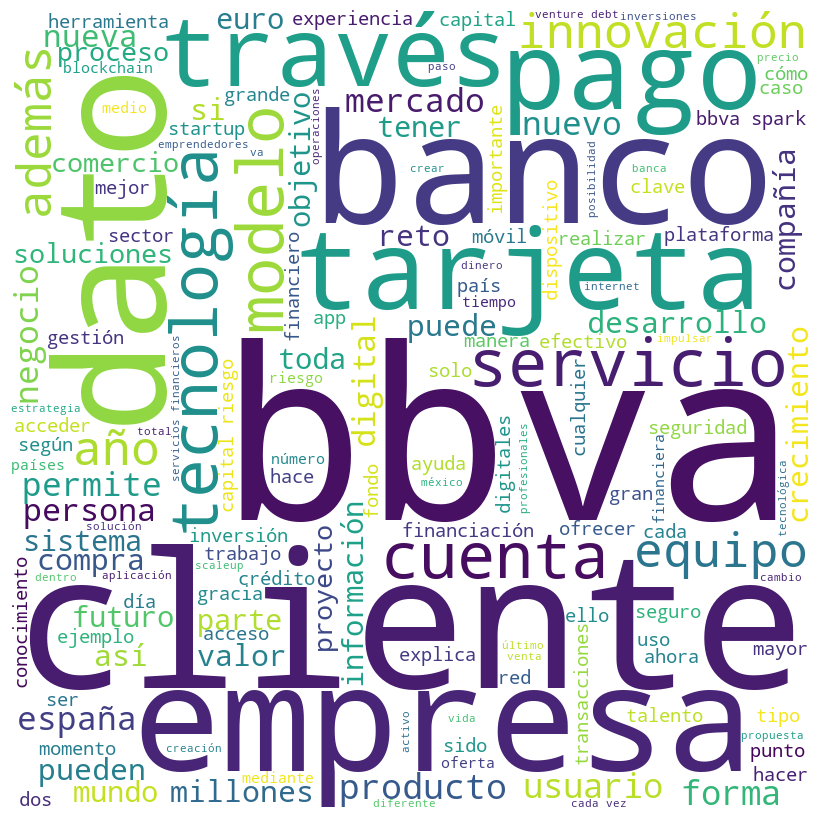

---------- Words for class: Otra ----------


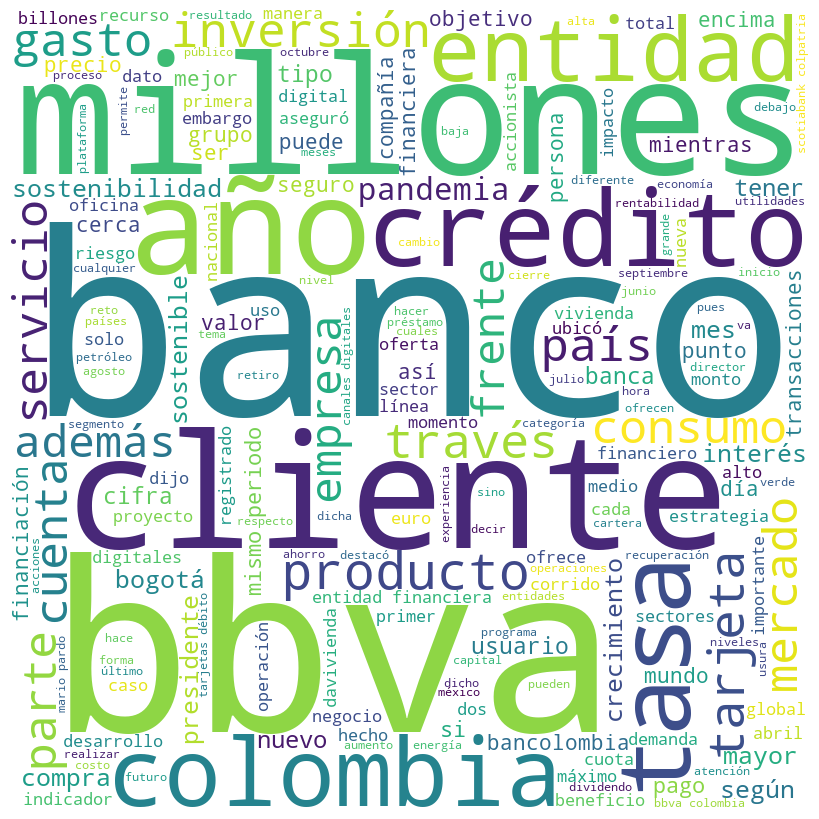

---------- Words for class: Sostenibilidad ----------


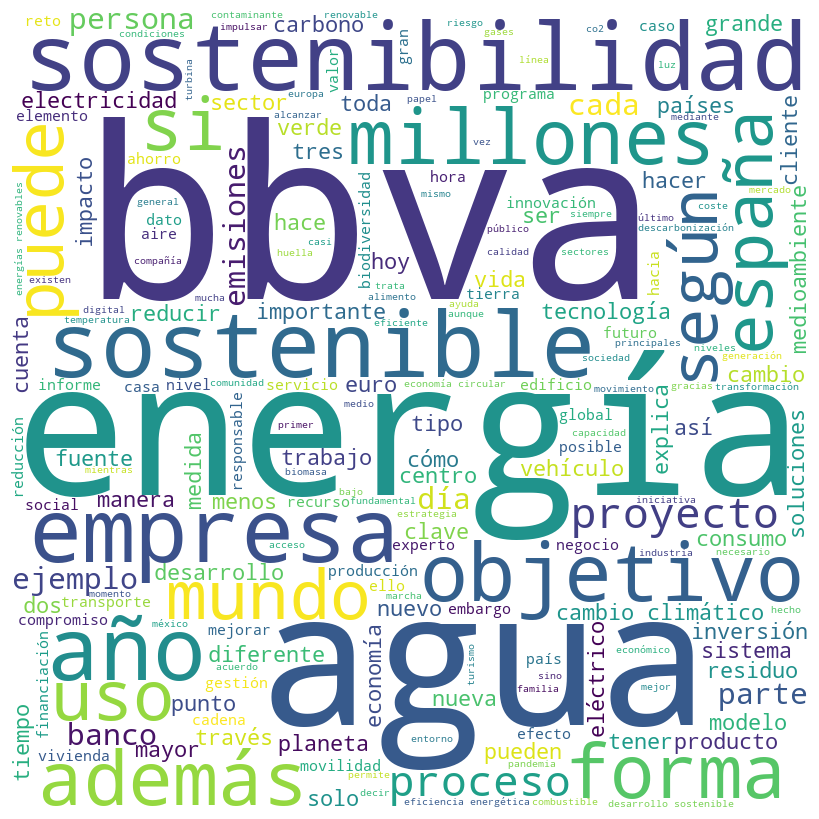

---------- Words for class: Macroeconomia ----------


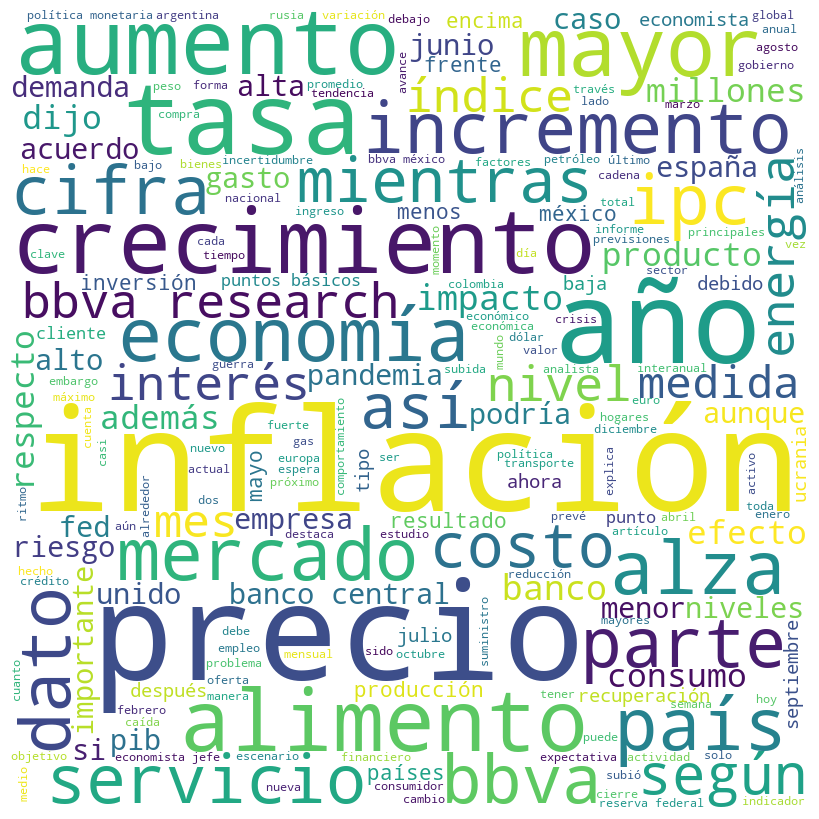

---------- Words for class: Regulaciones ----------


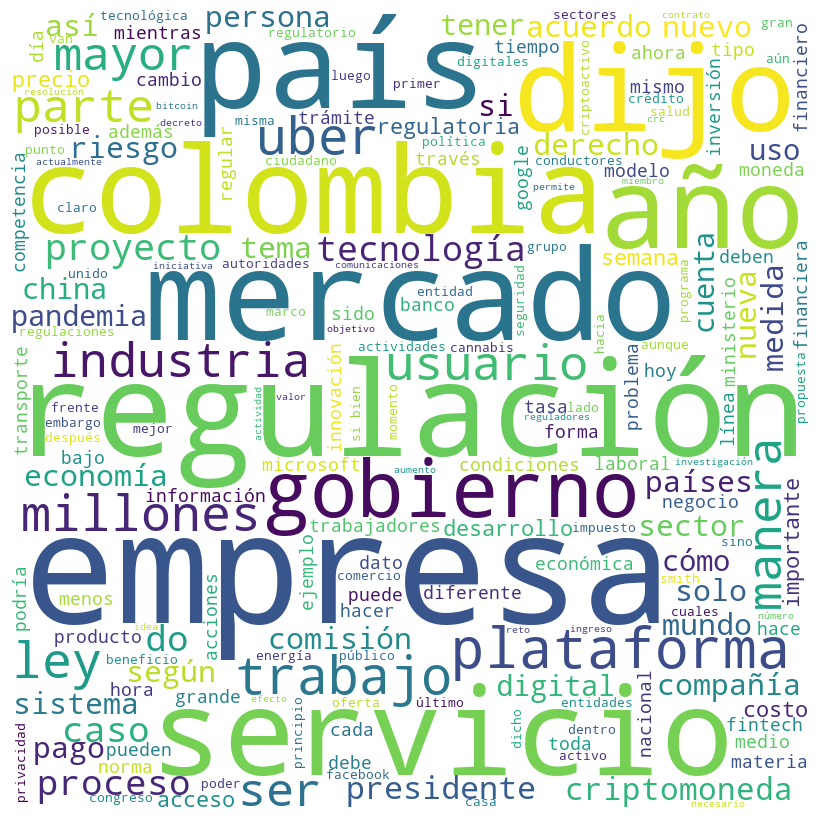

---------- Words for class: Alianzas ----------


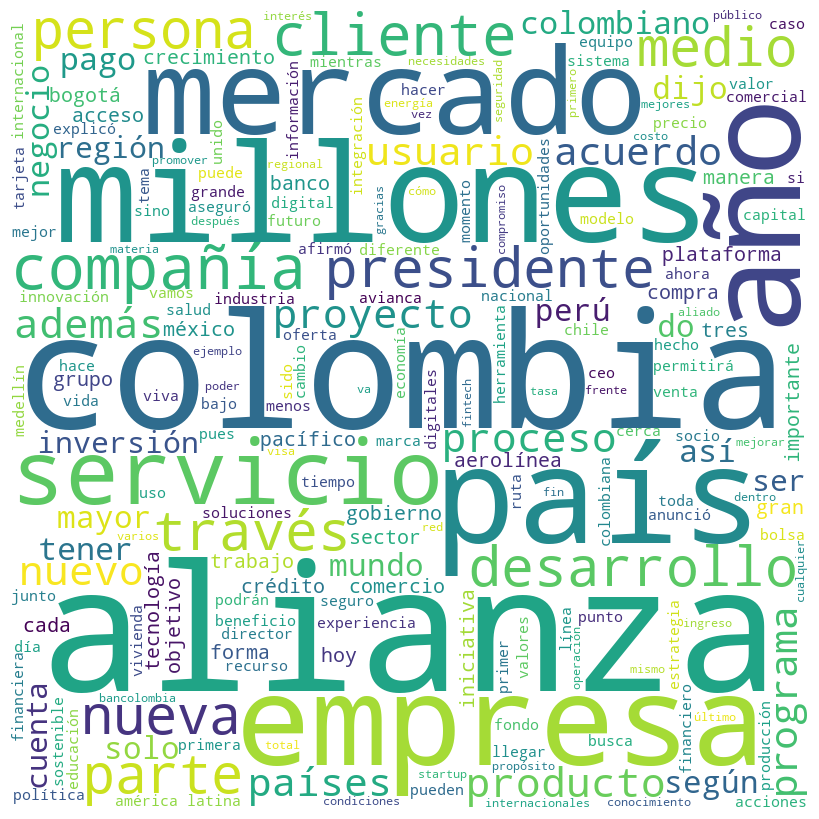

---------- Words for class: Reputacion ----------


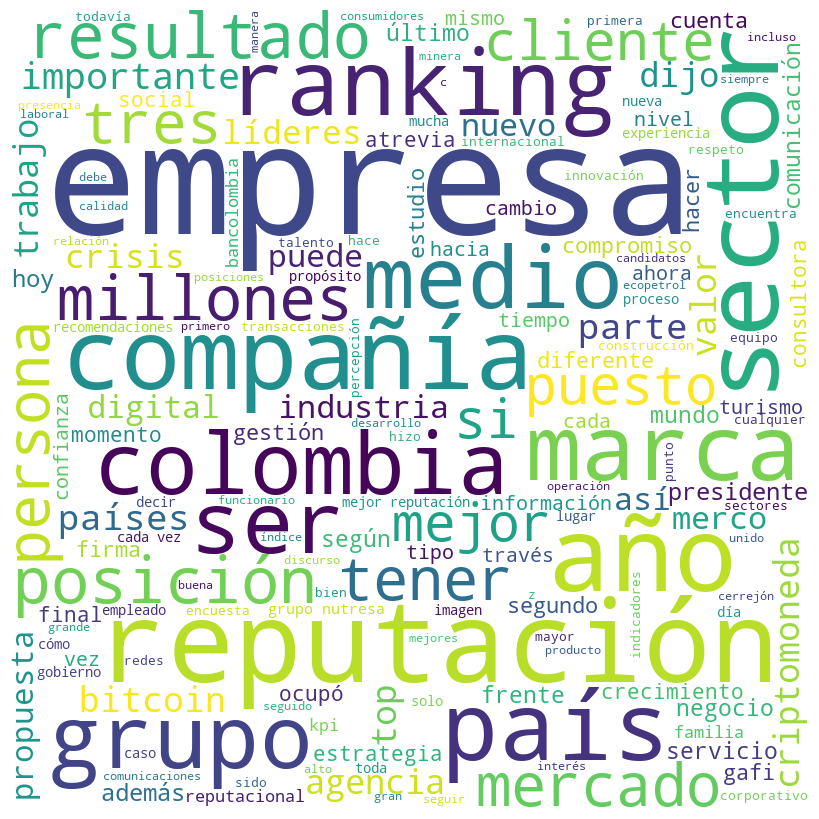

In [9]:
stop_words = stopwords.words('spanish')

for i in train['Type'].unique():
    print(f'---------- Words for class: {i} ----------')
    mostrar_grafico(train.loc[train['Type']==i,'news'], stopwords=stop_words)

## 3. Preparación de los datos

Primero dividiremos el texto de la categoría a la que pertenece, para poder realizar un análisis por categoría.

In [10]:
X_train, y_train = train['news'], train['Type']
display(X_train)
y_train

257     Como cambiarle a un coche su motor diésel por ...
1000    BBVA ha lanzado en España una nueva tarjeta de...
76      En el marco del Foro LR La banca promotora del...
204     El auge de las criptomonedas, especialmente en...
1148    Los expertos de las Naciones Unidas dicen que ...
                              ...                        
57      La economía global sigue dando señales crecien...
658     En Melbourne mientras en el centro de convenci...
578     Durante su primera sesión de Banca Experta de ...
391     México asumirá a partir de este miércoles la p...
1044    Teniendo en cuenta el Octavo Panel de Reputaci...
Name: news, Length: 973, dtype: object

257         Innovacion
1000        Innovacion
76                Otra
204         Innovacion
1148    Sostenibilidad
             ...      
57       Macroeconomia
658       Regulaciones
578      Macroeconomia
391           Alianzas
1044        Reputacion
Name: Type, Length: 973, dtype: object

Para poder realizar el pre-procesamiento de los datos, es recomendable pasar por tres etapas:
* Eliminación del Ruido.
* Tokenización.
* Normalización.

Para profundizar en el pre-procesamiento de los datos, pueden consultar el [siguiente artículo](https://medium.com/datos-y-ciencia/preprocesamiento-de-datos-de-texto-un-tutorial-en-python-5db5620f1767
).

#### **3.1 Eliminación del Ruido**
La eliminación del ruido se utiliza para dejar el archivo en texto plano, sobre todo cuando vienen de diferentes fuentes como HTML, Twitter, XML, entre otros. También para eliminar caracteres especiales y pasar todo a minúscula.

In [11]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words, stopwords=stopwords.words('spanish')):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def preproccesing(words):
    words = to_lowercase(words)
    #words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words


#### **3.2 Tokenización**
La tokenización permite dividir frases u oraciones en palabras. Con el fin de desglozar las palabras correctamente para el posterior análisis. Pero primero, se realiza una corrección de las contracciones que pueden estar presentes en los textos.

In [12]:
new_X_train = X_train.apply(word_tokenize)
new_X_train = new_X_train.apply(preproccesing) #Aplica la eliminación del ruido
new_X_train.head()

257     [cambiarle, coche, motor, diesel, electrico, m...
1000    [bbva, lanzado, espana, nueva, tarjeta, dentro...
76      [marco, foro, lr, banca, promotora, desarrollo...
204     [auge, criptomonedas, especialmente, regiones,...
1148    [expertos, naciones, unidas, dicen, cambio, cl...
Name: news, dtype: object

#### **3.3 Normalización**
Para la normalización de los datos se realiza una eliminación de prefijos y sufijos, además de realizar una lemmatización de los verbos.

In [13]:
def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = SnowballStemmer('spanish')
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def stem_and_lemmatize(words):
    words = stem_words(words)
    words = lemmatize_verbs(words)
    return words

new_X_train = new_X_train.apply(stem_and_lemmatize) #Aplica lematización y Eliminación de Prefijos y Sufijos.
new_X_train.head()

257     [cambi, coch, motor, diesel, electr, mientr, m...
1000    [bbva, lanz, espan, nuev, tarjet, dentr, gam, ...
76      [marc, for, lr, banc, promotor, desarroll, sos...
204     [aug, criptomoned, especial, region, amer, lat...
1148    [expert, nacion, unid, dic, cambi, climat, alt...
Name: news, dtype: object

#### **Transformación de campos**

In [14]:
train['trans'] = new_X_train.apply(lambda x: ' '.join(map(str, x)))
train

url  \
257   https://www.bbva.com/es/the-merge-ethereum-gan...   
1000  https://www.bbva.com/es/es/bbva-revoluciona-el...   
76     https://www.larepublica.co/redirect/post/3201861   
204   https://www.bbva.com/es/euros-digitales-cripto...   
1148  https://www.bbva.com/es/sostenibilidad/que-es-...   
...                                                 ...   
57    https://www.bbva.com/es/podcast-bbva-research-...   
658    https://www.larepublica.co/redirect/post/2942194   
578    https://www.larepublica.co/redirect/post/3293024   
391    https://www.larepublica.co/redirect/post/3291522   
1044   https://www.larepublica.co/redirect/post/3446957   

                                                   news            Type  \
257   Como cambiarle a un coche su motor diésel por ...      Innovacion   
1000  BBVA ha lanzado en España una nueva tarjeta de...      Innovacion   
76    En el marco del Foro LR La banca promotora del...            Otra   
204   El auge de las criptomonedas, especialmente en...      Innovacion   
1148  Los expertos de las Naciones Unidas dicen que ...  Sostenibilidad   
...                                                 ...             ...   
57    La economía global sigue dando señales crecien...   Macroeconomia   
658   En Melbourne mientras en el centro de convenci...    Regulaciones   
578   Durante su primera sesión de Banca Experta de ...   Macroeconomia   
391   México asumirá a partir de este miércoles la p...        Alianzas   
1044  Teniendo en cuenta el Octavo Panel de Reputaci...      Reputacion   

                                                  trans  
257   cambi coch motor diesel electr mientr march an...  
1000  bbva lanz espan nuev tarjet dentr gam aqu cara...  
76    marc for lr banc promotor desarroll sosten pre...  
204   aug criptomoned especial region amer latin pro...  
1148  expert nacion unid dic cambi climat alter comp...  
...                                                 ...  
57    economi global sig dand senal crecient desacel...  
658   melbourn mientr centr convencion realiz intern...  
578   primer sesion banc expert ano president asoban...  
391   mexic asumir part miercol president pro tempor...  
1044  cuent octav panel reput sector miner reun pres...  

[973 rows x 4 columns]

Primero, se transforma el texto con una transformación binaria 1 a 1, en donde a cada carácter se le asigna un valor binario único. Convertir el texto a una representación binaria puede ser útil para realizar operaciones lógicas bit a bit, facilitando la comparación de cadenas, la búsqueda de patrones, o la implementación de algoritmos específicos de manera más eficiente.

In [40]:
dummy = CountVectorizer(binary=True)
X_dummy = dummy.fit_transform(train['trans'])
print(X_dummy.shape)

  (0, 4586)	1
  (0, 5305)	1
  (0, 12540)	1
  (0, 7045)	1
  (0, 7645)	1
  (0, 12256)	1
  (0, 11811)	1
  (0, 3044)	1
  (0, 6598)	1
  (0, 16948)	1
  (0, 17232)	1
  (0, 16827)	1
  (0, 8318)	1
  (0, 17581)	1
  (0, 2422)	1
  (0, 9109)	1
  (0, 17302)	1
  (0, 18035)	1
  (0, 3153)	1
  (0, 17172)	1
  (0, 12126)	1
  (0, 5845)	1
  (0, 13557)	1
  (0, 9302)	1
  (0, 6249)	1
  :	:
  (972, 16151)	1
  (972, 13997)	1
  (972, 3415)	1
  (972, 7196)	1
  (972, 12981)	1
  (972, 5215)	1
  (972, 5832)	1
  (972, 6048)	1
  (972, 3480)	1
  (972, 4432)	1
  (972, 4981)	1
  (972, 7379)	1
  (972, 18623)	1
  (972, 3094)	1
  (972, 3538)	1
  (972, 5097)	1
  (972, 12314)	1
  (972, 9444)	1
  (972, 12177)	1
  (972, 15440)	1
  (972, 4984)	1
  (972, 837)	1
  (972, 1265)	1
  (972, 13720)	1
  (972, 14977)	1


También, se puede realizar el conteo de las palabras presentes.

In [41]:
count = CountVectorizer()
X_count = count.fit_transform(train['trans'])
print(X_count.shape)

(973, 18639)


O, se puede realizar la transformación Term-frecuency times inverse Document-frecuency. La transformación Term Frequency-Inverse Document Frequency (TF-IDF) es una técnica utilizada en el procesamiento de lenguaje natural (NLP) y la recuperación de información para reflejar la importancia de una palabra dentro de un documento en relación con una colección de documentos o corpus.



In [44]:
tf_idf = TfidfVectorizer()
X_tf_idf = tf_idf.fit_transform(train['trans'])
print(X_tf_idf.shape)

(973, 18639)


##4. Modelado

Primero, utilizaremos nuestro "preparador" de datos, y lo incluiremos en el Pipeline. Para poder realizar la búsqueda de nuestro mejor modelo.

In [18]:
class TextPreprocessing(BaseEstimator,TransformerMixin):
    def __init__(self,stopwords=stopwords.words('spanish')):
        self.stopwords = stopwords

    def remove_non_ascii(self, words):
        """Remove non-ASCII characters from list of tokenized words"""
        new_words = []
        for word in words:
            new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
            new_words.append(new_word)
        return new_words

    def to_lowercase(self, words):
        """Convert all characters to lowercase from list of tokenized words"""
        new_words = []
        for word in words:
            new_word = word.lower()
            new_words.append(new_word)
        return new_words

    def remove_punctuation(self, words):
        """Remove punctuation from list of tokenized words"""
        new_words = []
        for word in words:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
        return new_words

    def replace_numbers(self, words):
        """Replace all interger occurrences in list of tokenized words with textual representation"""
        p = inflect.engine()
        new_words = []
        for word in words:
            if word.isdigit():
                new_word = p.number_to_words(word)
                new_words.append(new_word)
            else:
                new_words.append(word)
        return new_words

    def remove_stopwords(self, words):
        """Remove stop words from list of tokenized words"""
        new_words = []
        for word in words:
            if word not in self.stopwords:
                new_words.append(word)
        return new_words

    def stem_words(self, words):
        """Stem words in list of tokenized words"""
        stemmer = SnowballStemmer('spanish')
        stems = []
        for word in words:
            stem = stemmer.stem(word)
            stems.append(stem)
        return stems

    def lemmatize_verbs(self, words):
        """Lemmatize verbs in list of tokenized words"""
        lemmatizer = WordNetLemmatizer()
        lemmas = []
        for word in words:
            lemma = lemmatizer.lemmatize(word, pos='v')
            lemmas.append(lemma)
        return lemmas

    def stem_and_lemmatize(self, words):
        words = self.stem_words(words)
        words = self.lemmatize_verbs(words)
        return words

    def preproccesing(self, words):
        words = self.to_lowercase(words)
        words = self.replace_numbers(words)
        words = self.remove_punctuation(words)
        words = self.remove_non_ascii(words)
        words = self.remove_stopwords(words)
        return words

    def fit(self,X,y=None):
        return self

    def transform(self,X,y=None):
        new_X_train = pd.Series(X)
        new_X_train = new_X_train.apply(contractions.fix)
        new_X_train = new_X_train.apply(word_tokenize)
        new_X_train = new_X_train.apply(lambda x: self.preproccesing(x))
        new_X_train = new_X_train.apply(lambda x: self.stem_and_lemmatize(x))
        new_X_train = new_X_train.apply(lambda x: ' '.join(map(str, x)))
        return new_X_train

In [49]:
estimators = [
        ('preproccess',TextPreprocessing()),
        ('transform',CountVectorizer(lowercase=False)),
        ('classifier', SVC(kernel='linear', probability=True))
    ]

pipe_SVM = Pipeline(estimators)

In [50]:
%%time
pipe_SVM.fit(X_train, y_train)

CPU times: user 14.2 s, sys: 12.7 ms, total: 14.2 s
Wall time: 14.2 s


Pipeline(steps=[('preproccess', TextPreprocessing()),
                ('transform', CountVectorizer(lowercase=False)),
                ('classifier', SVC(kernel='linear', probability=True))])

In [51]:
y_pred_train_SVM = pipe_SVM.predict(X_train)
y_pred_train_SVM

array(['Innovacion', 'Innovacion', 'Otra', 'Innovacion', 'Sostenibilidad',
       'Otra', 'Macroeconomia', 'Macroeconomia', 'Macroeconomia',
       'Regulaciones', 'Macroeconomia', 'Macroeconomia', 'Macroeconomia',
       'Alianzas', 'Macroeconomia', 'Otra', 'Otra', 'Otra', 'Otra',
       'Sostenibilidad', 'Sostenibilidad', 'Otra', 'Alianzas',
       'Macroeconomia', 'Alianzas', 'Alianzas', 'Innovacion',
       'Regulaciones', 'Sostenibilidad', 'Alianzas', 'Macroeconomia',
       'Regulaciones', 'Innovacion', 'Alianzas', 'Macroeconomia',
       'Innovacion', 'Macroeconomia', 'Sostenibilidad', 'Regulaciones',
       'Macroeconomia', 'Macroeconomia', 'Otra', 'Alianzas',
       'Macroeconomia', 'Macroeconomia', 'Innovacion', 'Sostenibilidad',
       'Sostenibilidad', 'Otra', 'Alianzas', 'Macroeconomia',
       'Innovacion', 'Regulaciones', 'Alianzas', 'Innovacion', 'Otra',
       'Macroeconomia', 'Alianzas', 'Alianzas', 'Macroeconomia',
       'Macroeconomia', 'Alianzas', 'Macroeconomia',

In [52]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,size=(10,10)):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')



    fig, ax = plt.subplots(figsize=size)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Y ya con nuestros clasificadores entrenados, podemos establecer nuestra **Matriz de Confusión**

Confusion matrix, without normalization


<Axes: title={'center': 'Matriz de Confusión'}, xlabel='Predicted label', ylabel='True label'>

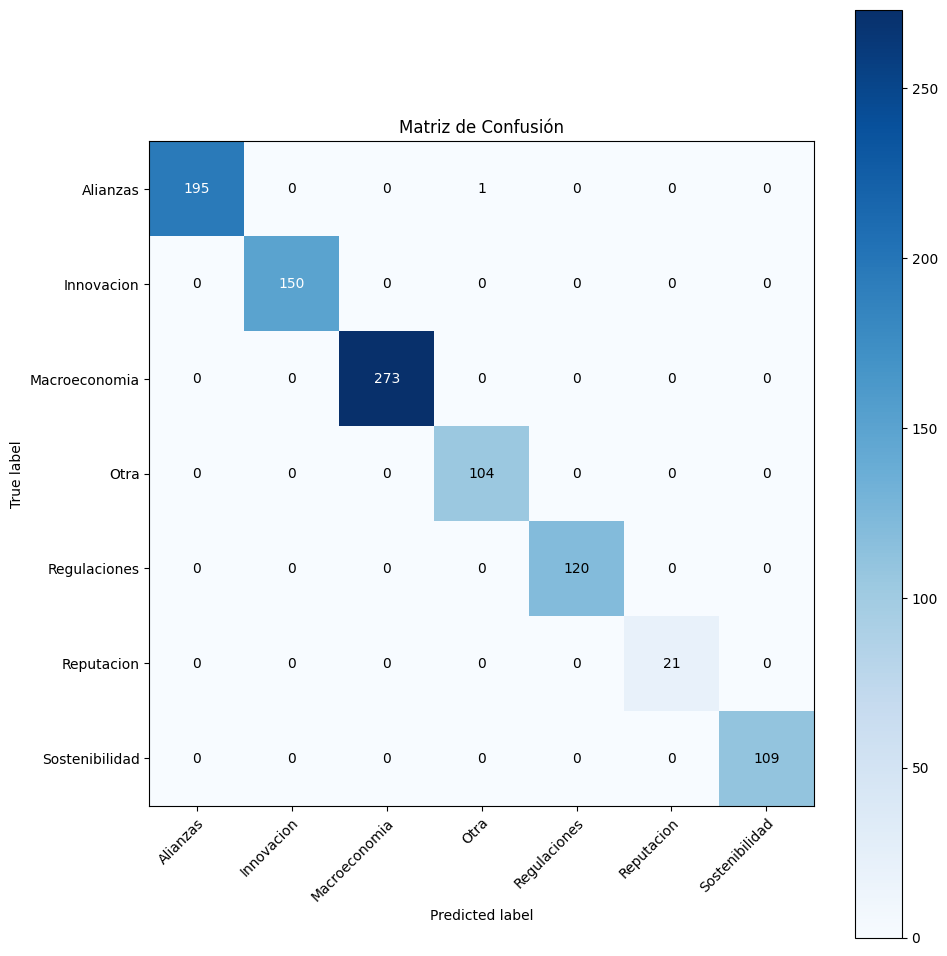

In [53]:
%matplotlib inline

classes = pipe_SVM['classifier'].classes_

plot_confusion_matrix(y_true=y_train, y_pred=y_pred_train_SVM, classes=classes,
                      title='Matriz de Confusión')

In [54]:
report_SVC = classification_report(y_train, y_pred_train_SVM)

print("Train Report for Support Vector Machines\n", report_SVC)

Train Report for Support Vector Machines
                 precision    recall  f1-score   support

      Alianzas       1.00      0.99      1.00       196
    Innovacion       1.00      1.00      1.00       150
 Macroeconomia       1.00      1.00      1.00       273
          Otra       0.99      1.00      1.00       104
  Regulaciones       1.00      1.00      1.00       120
    Reputacion       1.00      1.00      1.00        21
Sostenibilidad       1.00      1.00      1.00       109

      accuracy                           1.00       973
     macro avg       1.00      1.00      1.00       973
  weighted avg       1.00      1.00      1.00       973



¿Y si cambiamos el transformador y evaluamos los 3 transformadores que vimos?

In [55]:
parameters = {
              'transform':[CountVectorizer(binary=True,lowercase=False),CountVectorizer(lowercase=False),TfidfVectorizer(lowercase=False)],
              }

grid_search_SVM = GridSearchCV(pipe_SVM, parameters, scoring='precision_macro', cv=5, error_score=0.0)

In [56]:
%%time
grid_search_SVM.fit(X_train,y_train)

CPU times: user 3min 57s, sys: 61.5 ms, total: 3min 58s
Wall time: 3min 58s


GridSearchCV(cv=5, error_score=0.0,
             estimator=Pipeline(steps=[('preproccess', TextPreprocessing()),
                                       ('transform',
                                        CountVectorizer(lowercase=False)),
                                       ('classifier',
                                        SVC(kernel='linear',
                                            probability=True))]),
             param_grid={'transform': [CountVectorizer(binary=True,
                                                       lowercase=False),
                                       CountVectorizer(lowercase=False),
                                       TfidfVectorizer(lowercase=False)]},
             scoring='precision_macro')

In [57]:
grid_search_SVM.best_estimator_

Pipeline(steps=[('preproccess', TextPreprocessing()),
                ('transform', TfidfVectorizer(lowercase=False)),
                ('classifier', SVC(kernel='linear', probability=True))])

In [58]:
y_pred_train_MB = grid_search_SVM.best_estimator_.predict(X_train)
report_MB = classification_report(y_train, y_pred_train_MB)

print("Train Report\n", report_MB)

Train Report
                 precision    recall  f1-score   support

      Alianzas       0.99      0.99      0.99       196
    Innovacion       0.97      1.00      0.99       150
 Macroeconomia       1.00      0.99      0.99       273
          Otra       0.98      0.97      0.98       104
  Regulaciones       0.99      1.00      1.00       120
    Reputacion       1.00      0.95      0.98        21
Sostenibilidad       1.00      0.98      0.99       109

      accuracy                           0.99       973
     macro avg       0.99      0.98      0.99       973
  weighted avg       0.99      0.99      0.99       973



Ahora, realicemos una búsqueda más profunda.

In [59]:
parameters = {
                'transform':[CountVectorizer(binary=True,lowercase=False),
                            CountVectorizer(lowercase=False),
                            TfidfVectorizer(lowercase=False)],
                'classifier__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                'classifier__C': [1, 5, 10]
}

grid_search = GridSearchCV(pipe_SVM, parameters, scoring='precision_macro', cv=5, error_score=0.0, verbose=2)

In [60]:
%%time
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END classifier__C=1, classifier__kernel=linear, transform=CountVectorizer(binary=True, lowercase=False); total time=  15.8s
[CV] END classifier__C=1, classifier__kernel=linear, transform=CountVectorizer(binary=True, lowercase=False); total time=  15.2s
[CV] END classifier__C=1, classifier__kernel=linear, transform=CountVectorizer(binary=True, lowercase=False); total time=  15.1s
[CV] END classifier__C=1, classifier__kernel=linear, transform=CountVectorizer(binary=True, lowercase=False); total time=  14.9s
[CV] END classifier__C=1, classifier__kernel=linear, transform=CountVectorizer(binary=True, lowercase=False); total time=  15.4s
[CV] END classifier__C=1, classifier__kernel=linear, transform=CountVectorizer(lowercase=False); total time=  13.0s
[CV] END classifier__C=1, classifier__kernel=linear, transform=CountVectorizer(lowercase=False); total time=  13.8s
[CV] END classifier__C=1, classifier__kernel=linear, transfor

/home/leandro_driguez/github/isis4219/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END classifier__C=1, classifier__kernel=rbf, transform=CountVectorizer(binary=True, lowercase=False); total time=  17.0s


/home/leandro_driguez/github/isis4219/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END classifier__C=1, classifier__kernel=rbf, transform=CountVectorizer(binary=True, lowercase=False); total time=  17.0s


/home/leandro_driguez/github/isis4219/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END classifier__C=1, classifier__kernel=rbf, transform=CountVectorizer(binary=True, lowercase=False); total time=  17.1s


/home/leandro_driguez/github/isis4219/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END classifier__C=1, classifier__kernel=rbf, transform=CountVectorizer(binary=True, lowercase=False); total time=  16.9s


/home/leandro_driguez/github/isis4219/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END classifier__C=1, classifier__kernel=rbf, transform=CountVectorizer(binary=True, lowercase=False); total time=  17.1s


/home/leandro_driguez/github/isis4219/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END classifier__C=1, classifier__kernel=rbf, transform=CountVectorizer(lowercase=False); total time=  15.8s
[CV] END classifier__C=1, classifier__kernel=rbf, transform=CountVectorizer(lowercase=False); total time=  16.0s
[CV] END classifier__C=1, classifier__kernel=rbf, transform=CountVectorizer(lowercase=False); total time=  16.1s


/home/leandro_driguez/github/isis4219/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END classifier__C=1, classifier__kernel=rbf, transform=CountVectorizer(lowercase=False); total time=  15.7s
[CV] END classifier__C=1, classifier__kernel=rbf, transform=CountVectorizer(lowercase=False); total time=  15.7s


/home/leandro_driguez/github/isis4219/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END classifier__C=1, classifier__kernel=rbf, transform=TfidfVectorizer(lowercase=False); total time=  16.9s
[CV] END classifier__C=1, classifier__kernel=rbf, transform=TfidfVectorizer(lowercase=False); total time=  16.9s
[CV] END classifier__C=1, classifier__kernel=rbf, transform=TfidfVectorizer(lowercase=False); total time=  17.0s
[CV] END classifier__C=1, classifier__kernel=rbf, transform=TfidfVectorizer(lowercase=False); total time=  16.6s
[CV] END classifier__C=1, classifier__kernel=rbf, transform=TfidfVectorizer(lowercase=False); total time=  16.9s


/home/leandro_driguez/github/isis4219/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END classifier__C=1, classifier__kernel=poly, transform=CountVectorizer(binary=True, lowercase=False); total time=  17.0s


/home/leandro_driguez/github/isis4219/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END classifier__C=1, classifier__kernel=poly, transform=CountVectorizer(binary=True, lowercase=False); total time=  16.9s


/home/leandro_driguez/github/isis4219/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END classifier__C=1, classifier__kernel=poly, transform=CountVectorizer(binary=True, lowercase=False); total time=  17.0s


/home/leandro_driguez/github/isis4219/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END classifier__C=1, classifier__kernel=poly, transform=CountVectorizer(binary=True, lowercase=False); total time=  16.8s


/home/leandro_driguez/github/isis4219/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END classifier__C=1, classifier__kernel=poly, transform=CountVectorizer(binary=True, lowercase=False); total time=  17.1s
[CV] END classifier__C=1, classifier__kernel=poly, transform=CountVectorizer(lowercase=False); total time=  15.8s
[CV] END classifier__C=1, classifier__kernel=poly, transform=CountVectorizer(lowercase=False); total time=  15.7s


/home/leandro_driguez/github/isis4219/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END classifier__C=1, classifier__kernel=poly, transform=CountVectorizer(lowercase=False); total time=  15.9s


/home/leandro_driguez/github/isis4219/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END classifier__C=1, classifier__kernel=poly, transform=CountVectorizer(lowercase=False); total time=  15.7s


/home/leandro_driguez/github/isis4219/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END classifier__C=1, classifier__kernel=poly, transform=CountVectorizer(lowercase=False); total time=  16.1s


/home/leandro_driguez/github/isis4219/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END classifier__C=1, classifier__kernel=poly, transform=TfidfVectorizer(lowercase=False); total time=  17.6s


/home/leandro_driguez/github/isis4219/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END classifier__C=1, classifier__kernel=poly, transform=TfidfVectorizer(lowercase=False); total time=  17.0s


/home/leandro_driguez/github/isis4219/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END classifier__C=1, classifier__kernel=poly, transform=TfidfVectorizer(lowercase=False); total time=  17.2s


/home/leandro_driguez/github/isis4219/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END classifier__C=1, classifier__kernel=poly, transform=TfidfVectorizer(lowercase=False); total time=  16.9s


/home/leandro_driguez/github/isis4219/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END classifier__C=1, classifier__kernel=poly, transform=TfidfVectorizer(lowercase=False); total time=  17.2s


/home/leandro_driguez/github/isis4219/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END classifier__C=1, classifier__kernel=sigmoid, transform=CountVectorizer(binary=True, lowercase=False); total time=  14.3s


/home/leandro_driguez/github/isis4219/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END classifier__C=1, classifier__kernel=sigmoid, transform=CountVectorizer(binary=True, lowercase=False); total time=  14.2s
[CV] END classifier__C=1, classifier__kernel=sigmoid, transform=CountVectorizer(binary=True, lowercase=False); total time=  14.2s
[CV] END classifier__C=1, classifier__kernel=sigmoid, transform=CountVectorizer(binary=True, lowercase=False); total time=  15.0s
[CV] END classifier__C=1, classifier__kernel=sigmoid, transform=CountVectorizer(binary=True, lowercase=False); total time=  14.8s
[CV] END classifier__C=1, classifier__kernel=sigmoid, transform=CountVectorizer(lowercase=False); total time=  13.0s
[CV] END classifier__C=1, classifier__kernel=sigmoid, transform=CountVectorizer(lowercase=False); total time=  13.5s
[CV] END classifier__C=1, classifier__kernel=sigmoid, transform=CountVectorizer(lowercase=False); total time=  13.1s


/home/leandro_driguez/github/isis4219/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END classifier__C=1, classifier__kernel=sigmoid, transform=CountVectorizer(lowercase=False); total time=  13.3s
[CV] END classifier__C=1, classifier__kernel=sigmoid, transform=CountVectorizer(lowercase=False); total time=  13.1s
[CV] END classifier__C=1, classifier__kernel=sigmoid, transform=TfidfVectorizer(lowercase=False); total time=  14.7s
[CV] END classifier__C=1, classifier__kernel=sigmoid, transform=TfidfVectorizer(lowercase=False); total time=  14.7s
[CV] END classifier__C=1, classifier__kernel=sigmoid, transform=TfidfVectorizer(lowercase=False); total time=  15.5s
[CV] END classifier__C=1, classifier__kernel=sigmoid, transform=TfidfVectorizer(lowercase=False); total time=  15.3s
[CV] END classifier__C=1, classifier__kernel=sigmoid, transform=TfidfVectorizer(lowercase=False); total time=  14.7s
[CV] END classifier__C=5, classifier__kernel=linear, transform=CountVectorizer(binary=True, lowercase=False); total time=  15.0s
[CV] END classifier__C=5, classifier__kernel=linear,

/home/leandro_driguez/github/isis4219/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END classifier__C=5, classifier__kernel=rbf, transform=CountVectorizer(binary=True, lowercase=False); total time=  17.3s


/home/leandro_driguez/github/isis4219/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END classifier__C=5, classifier__kernel=rbf, transform=CountVectorizer(binary=True, lowercase=False); total time=  17.0s
[CV] END classifier__C=5, classifier__kernel=rbf, transform=CountVectorizer(binary=True, lowercase=False); total time=  17.5s
[CV] END classifier__C=5, classifier__kernel=rbf, transform=CountVectorizer(binary=True, lowercase=False); total time=  17.2s
[CV] END classifier__C=5, classifier__kernel=rbf, transform=CountVectorizer(binary=True, lowercase=False); total time=  17.1s
[CV] END classifier__C=5, classifier__kernel=rbf, transform=CountVectorizer(lowercase=False); total time=  16.1s
[CV] END classifier__C=5, classifier__kernel=rbf, transform=CountVectorizer(lowercase=False); total time=  16.1s
[CV] END classifier__C=5, classifier__kernel=rbf, transform=CountVectorizer(lowercase=False); total time=  16.1s
[CV] END classifier__C=5, classifier__kernel=rbf, transform=CountVectorizer(lowercase=False); total time=  16.1s
[CV] END classifier__C=5, classifier__kernel

/home/leandro_driguez/github/isis4219/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END classifier__C=5, classifier__kernel=poly, transform=CountVectorizer(binary=True, lowercase=False); total time=  17.9s


/home/leandro_driguez/github/isis4219/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END classifier__C=5, classifier__kernel=poly, transform=CountVectorizer(binary=True, lowercase=False); total time=  16.9s


/home/leandro_driguez/github/isis4219/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END classifier__C=5, classifier__kernel=poly, transform=CountVectorizer(binary=True, lowercase=False); total time=  17.0s


/home/leandro_driguez/github/isis4219/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END classifier__C=5, classifier__kernel=poly, transform=CountVectorizer(binary=True, lowercase=False); total time=  16.8s
[CV] END classifier__C=5, classifier__kernel=poly, transform=CountVectorizer(binary=True, lowercase=False); total time=  17.5s
[CV] END classifier__C=5, classifier__kernel=poly, transform=CountVectorizer(lowercase=False); total time=  16.2s
[CV] END classifier__C=5, classifier__kernel=poly, transform=CountVectorizer(lowercase=False); total time=  16.1s
[CV] END classifier__C=5, classifier__kernel=poly, transform=CountVectorizer(lowercase=False); total time=  15.9s
[CV] END classifier__C=5, classifier__kernel=poly, transform=CountVectorizer(lowercase=False); total time=  16.5s
[CV] END classifier__C=5, classifier__kernel=poly, transform=CountVectorizer(lowercase=False); total time=  15.6s


/home/leandro_driguez/github/isis4219/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END classifier__C=5, classifier__kernel=poly, transform=TfidfVectorizer(lowercase=False); total time=  17.0s


/home/leandro_driguez/github/isis4219/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END classifier__C=5, classifier__kernel=poly, transform=TfidfVectorizer(lowercase=False); total time=  16.8s
[CV] END classifier__C=5, classifier__kernel=poly, transform=TfidfVectorizer(lowercase=False); total time=  16.9s


/home/leandro_driguez/github/isis4219/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END classifier__C=5, classifier__kernel=poly, transform=TfidfVectorizer(lowercase=False); total time=  16.6s
[CV] END classifier__C=5, classifier__kernel=poly, transform=TfidfVectorizer(lowercase=False); total time=  16.7s
[CV] END classifier__C=5, classifier__kernel=sigmoid, transform=CountVectorizer(binary=True, lowercase=False); total time=  14.5s
[CV] END classifier__C=5, classifier__kernel=sigmoid, transform=CountVectorizer(binary=True, lowercase=False); total time=  14.5s
[CV] END classifier__C=5, classifier__kernel=sigmoid, transform=CountVectorizer(binary=True, lowercase=False); total time=  15.0s
[CV] END classifier__C=5, classifier__kernel=sigmoid, transform=CountVectorizer(binary=True, lowercase=False); total time=  15.2s
[CV] END classifier__C=5, classifier__kernel=sigmoid, transform=CountVectorizer(binary=True, lowercase=False); total time=  15.2s
[CV] END classifier__C=5, classifier__kernel=sigmoid, transform=CountVectorizer(lowercase=False); total time=  12.5s
[CV] 

/home/leandro_driguez/github/isis4219/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END classifier__C=10, classifier__kernel=rbf, transform=CountVectorizer(binary=True, lowercase=False); total time=  17.0s


/home/leandro_driguez/github/isis4219/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END classifier__C=10, classifier__kernel=rbf, transform=CountVectorizer(binary=True, lowercase=False); total time=  18.0s
[CV] END classifier__C=10, classifier__kernel=rbf, transform=CountVectorizer(binary=True, lowercase=False); total time=  18.1s
[CV] END classifier__C=10, classifier__kernel=rbf, transform=CountVectorizer(binary=True, lowercase=False); total time=  18.1s
[CV] END classifier__C=10, classifier__kernel=rbf, transform=CountVectorizer(binary=True, lowercase=False); total time=  18.0s
[CV] END classifier__C=10, classifier__kernel=rbf, transform=CountVectorizer(lowercase=False); total time=  15.9s
[CV] END classifier__C=10, classifier__kernel=rbf, transform=CountVectorizer(lowercase=False); total time=  15.9s
[CV] END classifier__C=10, classifier__kernel=rbf, transform=CountVectorizer(lowercase=False); total time=  15.9s
[CV] END classifier__C=10, classifier__kernel=rbf, transform=CountVectorizer(lowercase=False); total time=  15.8s
[CV] END classifier__C=10, classifie

/home/leandro_driguez/github/isis4219/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END classifier__C=10, classifier__kernel=poly, transform=CountVectorizer(binary=True, lowercase=False); total time=  17.4s


/home/leandro_driguez/github/isis4219/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END classifier__C=10, classifier__kernel=poly, transform=CountVectorizer(binary=True, lowercase=False); total time=  17.1s


/home/leandro_driguez/github/isis4219/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END classifier__C=10, classifier__kernel=poly, transform=CountVectorizer(binary=True, lowercase=False); total time=  17.1s


/home/leandro_driguez/github/isis4219/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END classifier__C=10, classifier__kernel=poly, transform=CountVectorizer(binary=True, lowercase=False); total time=  16.8s
[CV] END classifier__C=10, classifier__kernel=poly, transform=CountVectorizer(binary=True, lowercase=False); total time=  17.2s
[CV] END classifier__C=10, classifier__kernel=poly, transform=CountVectorizer(lowercase=False); total time=  16.0s
[CV] END classifier__C=10, classifier__kernel=poly, transform=CountVectorizer(lowercase=False); total time=  15.8s
[CV] END classifier__C=10, classifier__kernel=poly, transform=CountVectorizer(lowercase=False); total time=  15.9s
[CV] END classifier__C=10, classifier__kernel=poly, transform=CountVectorizer(lowercase=False); total time=  15.5s
[CV] END classifier__C=10, classifier__kernel=poly, transform=CountVectorizer(lowercase=False); total time=  15.9s


/home/leandro_driguez/github/isis4219/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END classifier__C=10, classifier__kernel=poly, transform=TfidfVectorizer(lowercase=False); total time=  17.3s


/home/leandro_driguez/github/isis4219/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END classifier__C=10, classifier__kernel=poly, transform=TfidfVectorizer(lowercase=False); total time=  17.3s
[CV] END classifier__C=10, classifier__kernel=poly, transform=TfidfVectorizer(lowercase=False); total time=  16.7s


/home/leandro_driguez/github/isis4219/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END classifier__C=10, classifier__kernel=poly, transform=TfidfVectorizer(lowercase=False); total time=  16.5s
[CV] END classifier__C=10, classifier__kernel=poly, transform=TfidfVectorizer(lowercase=False); total time=  16.7s
[CV] END classifier__C=10, classifier__kernel=sigmoid, transform=CountVectorizer(binary=True, lowercase=False); total time=  14.0s
[CV] END classifier__C=10, classifier__kernel=sigmoid, transform=CountVectorizer(binary=True, lowercase=False); total time=  14.2s
[CV] END classifier__C=10, classifier__kernel=sigmoid, transform=CountVectorizer(binary=True, lowercase=False); total time=  14.4s
[CV] END classifier__C=10, classifier__kernel=sigmoid, transform=CountVectorizer(binary=True, lowercase=False); total time=  14.3s
[CV] END classifier__C=10, classifier__kernel=sigmoid, transform=CountVectorizer(binary=True, lowercase=False); total time=  14.5s
[CV] END classifier__C=10, classifier__kernel=sigmoid, transform=CountVectorizer(lowercase=False); total time=  11.

GridSearchCV(cv=5, error_score=0.0,
             estimator=Pipeline(steps=[('preproccess', TextPreprocessing()),
                                       ('transform',
                                        CountVectorizer(lowercase=False)),
                                       ('classifier',
                                        SVC(kernel='linear',
                                            probability=True))]),
             param_grid={'classifier__C': [1, 5, 10],
                         'classifier__kernel': ['linear', 'rbf', 'poly',
                                                'sigmoid'],
                         'transform': [CountVectorizer(binary=True,
                                                       lowercase=False),
                                       CountVectorizer(lowercase=False),
                                       TfidfVectorizer(lowercase=False)]},
             scoring='precision_macro', verbose=2)

In [61]:
grid_search.best_params_

{'classifier__C': 10,
 'classifier__kernel': 'linear',
 'transform': TfidfVectorizer(lowercase=False)}

Y obtengamos los resultados de nuestro mejor modelo.

In [62]:
best_model = grid_search.best_estimator_

y_pred_train_MB = best_model.predict(X_train)
report_MB = classification_report(y_train, y_pred_train_MB)

print("Train Report\n", report_MB)

Train Report
                 precision    recall  f1-score   support

      Alianzas       0.99      1.00      0.99       196
    Innovacion       1.00      1.00      1.00       150
 Macroeconomia       1.00      1.00      1.00       273
          Otra       1.00      0.99      1.00       104
  Regulaciones       1.00      1.00      1.00       120
    Reputacion       1.00      1.00      1.00        21
Sostenibilidad       1.00      1.00      1.00       109

      accuracy                           1.00       973
     macro avg       1.00      1.00      1.00       973
  weighted avg       1.00      1.00      1.00       973



## 5. Producción

Evaluemos como le fue con datos que el no conoce.

In [63]:
y_pred_test_GS = best_model.predict(test['news'])
report_GS = classification_report(test['Type'], y_pred_test_GS)

print("Test Report\n", report_GS)

Test Report
                 precision    recall  f1-score   support

      Alianzas       0.75      0.94      0.83        51
    Innovacion       0.98      0.96      0.97        45
 Macroeconomia       0.94      0.96      0.95        67
          Otra       0.89      0.62      0.73        26
  Regulaciones       0.94      0.77      0.85        22
    Reputacion       1.00      0.60      0.75         5
Sostenibilidad       0.90      0.93      0.91        28

      accuracy                           0.89       244
     macro avg       0.91      0.82      0.86       244
  weighted avg       0.90      0.89      0.89       244



Y estimemos las probabilidad a ver en que categoria predice.

/run/user/1000/ipykernel_120993/1372430405.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


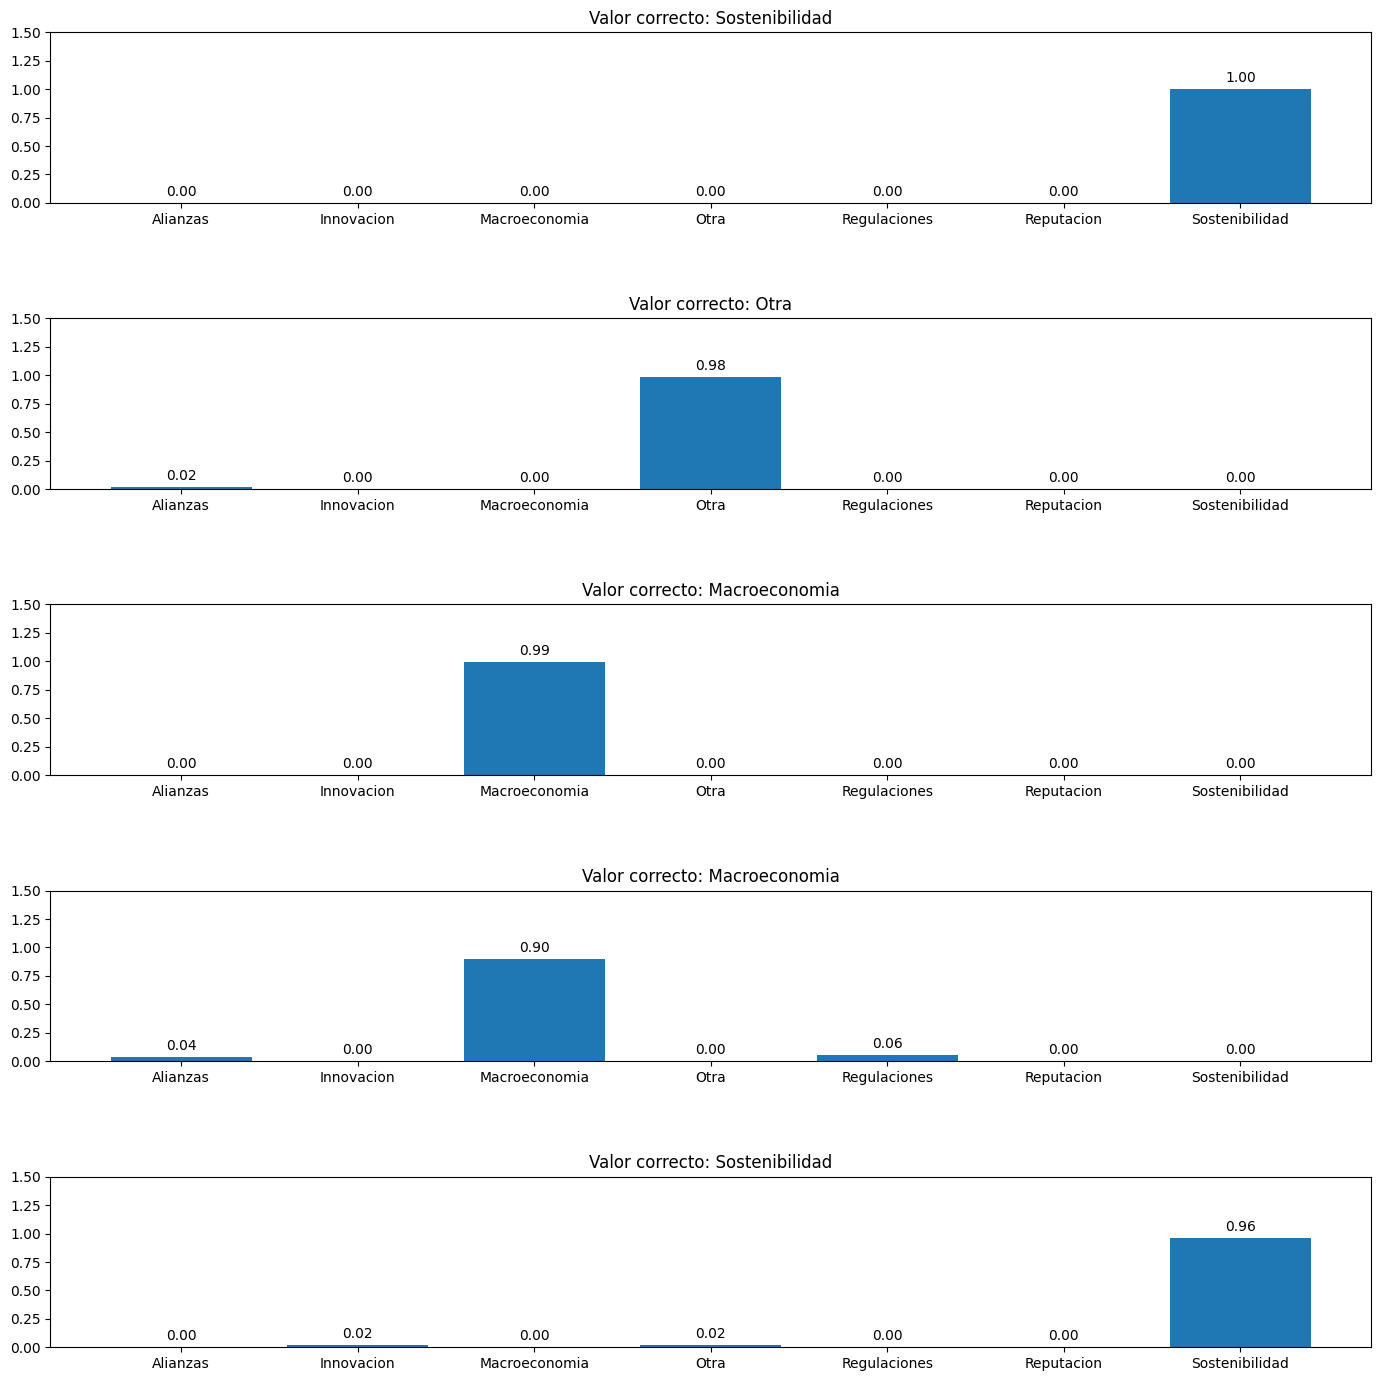

In [64]:
cant = 5
classes = best_model['classifier'].classes_
values = best_model.predict_proba(test['news'].values[:cant])

fig, axes = plt.subplots(cant, 1, figsize=(15, 15))
for i in range(cant):
    axes[i].set_title(f"Valor correcto: {test['Type'].values[i]}")
    axes[i].set_ylim(0, 1.5)
    pps = axes[i].bar(classes, values[i])
    for p in pps:
        height = p.get_height()
        axes[i].annotate('{0:.2f}'.format(height),
            xy=(p.get_x() + p.get_width() / 2, height),
            xytext=(0, 3), # 3 points vertical offset
            textcoords="offset points",
            ha='center', va='bottom')



fig.tight_layout(pad=5.0)
fig.show()

## Preguntas

- ¿Qué creen que pasó? ¿Por qué los rendimientos son tan diferentes?
- ¿Hay desbalanceo de datos? ¿Como haría para combatirlo?
- ¿Por qué creen que los rendimientos de precision son mejores que los de recall? ¿Tendrá que ver la forma en como entrenamos?